<a href="https://colab.research.google.com/github/8Ishita8/AI-ML-Project/blob/main/AI_ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving co2_emission.csv to co2_emission.csv


Full Code


               Country Continent           Hemisphere  \
0          Afghanistan      Asia  Northern Hemisphere   
1              Albania    Europe  Northern Hemisphere   
2              Algeria    Africa  Northern Hemisphere   
3               Angola    Africa  Southern Hemisphere   
4  Antigua and Barbuda   America  Northern Hemisphere   

   Metric tons of CO2e per capita (1990)  \
0                                   1.24   
1                                   3.56   
2                                   3.50   
3                                   4.29   
4                                   6.31   

   Metric tons of CO2e per capita (1995)  \
0                                   0.84   
1                                   2.15   
2                                   3.42   
3                                   4.43   
4                                   6.53   

   Metric tons of CO2e per capita (2000)  \
0                                   0.82   
1                                   2.3

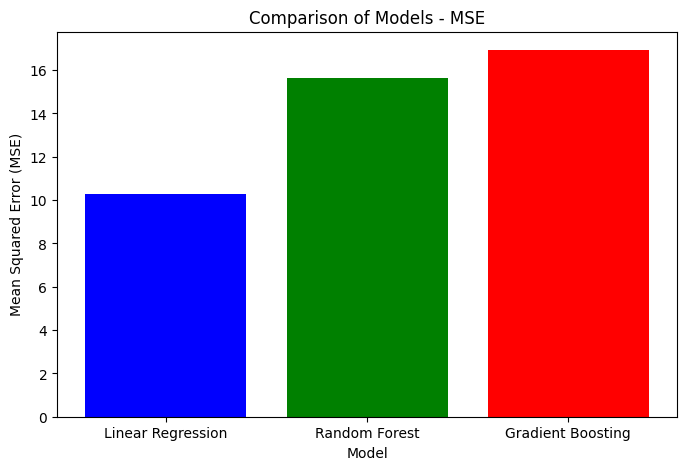

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

import pandas as pd
import io


df = pd.read_csv(io.BytesIO(uploaded['co2_emission.csv']))
# Check the first few rows of the dataset
print(df.head())

# Step 1: Data Preprocessing
print("\nMissing values in each column:")
print(df.isnull().sum())

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=np.number).columns] = imputer.fit_transform(df.select_dtypes(include=np.number))

# Step 2: Define features (X) and target (y)
df = pd.get_dummies(df, columns=['Country', 'Continent', 'Hemisphere'], drop_first=True)  # Encoding categorical variables
X = df.drop(columns=['Metric tons of CO2e per capita (2018)'])
y = df['Metric tons of CO2e per capita (2018)']

# Step 3: Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Step 6: Train and evaluate models using cross-validation
results = {}
for name, model in models.items():
    print(f"\nTraining and evaluating {name} model...")
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = -cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results[name] = {
        'CV Mean MSE': np.mean(cv_scores),
        'CV Standard Deviation': np.std(cv_scores)
    }

    # Fit model and evaluate on test data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name]['MAE'] = mae
    results[name]['MSE'] = mse
    results[name]['R^2'] = r2
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, R^2: {r2:.4f}")

# Step 7: Visualize results
models_names = list(results.keys())
mse_values = [results[model]['MSE'] for model in models_names]

plt.figure(figsize=(8, 5))
plt.bar(models_names, mse_values, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Models - MSE')
plt.show()


Code with divided outputs

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE  # In case of class imbalance in classification tasks
import matplotlib.pyplot as plt

# Load dataset (for regression task)
df = pd.read_csv('co2_emission.csv')

# Step 1: Data Preprocessing
print("\nMissing values in each column:")
print(df.isnull().sum())

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=np.number).columns] = imputer.fit_transform(df.select_dtypes(include=np.number))

# Step 2: Define features (X) and target (y)
df = pd.get_dummies(df, columns=['Country', 'Continent', 'Hemisphere'], drop_first=True)  # Encoding categorical variables
X = df.drop(columns=['Metric tons of CO2e per capita (2018)'])
y = df['Metric tons of CO2e per capita (2018)']

# Step 3: Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




Missing values in each column:
Country                                   0
Continent                                 0
Hemisphere                                0
Metric tons of CO2e per capita (1990)    27
Metric tons of CO2e per capita (1995)     4
Metric tons of CO2e per capita (2000)     2
Metric tons of CO2e per capita (2005)     2
Metric tons of CO2e per capita (2010)     0
Metric tons of CO2e per capita (2013)     1
Metric tons of CO2e per capita (2018)     1
dtype: int64


In [ ]:
# Step 4: Define and train multiple machine learning models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Store results
results = {}

# Step 5: Train and evaluate models using cross-validation
for name, model in models.items():
    print(f"\nTraining and evaluating {name} model...")

    # Cross-validation (K-Fold)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='neg_mean_squared_error')

    # Calculate mean of cross-validation scores (as negative MSE)
    results[name] = {
        'CV Mean MSE': np.mean(cv_scores),
        'CV Standard Deviation': np.std(cv_scores)
    }

    # Fit model on the training data
    model.fit(X_scaled, y)

    # Predict on the test data
    y_pred = model.predict(X_scaled)

    # Step 6: Evaluate the model on the test data
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Print performance metrics
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")

    # Store results
    results[name]['MAE'] = mae
    results[name]['MSE'] = mse
    results[name]['R^2'] = r2



Training and evaluating Linear Regression model...
Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
R^2 Score: 1.0000

Training and evaluating Random Forest model...
Mean Absolute Error (MAE): 0.4520
Mean Squared Error (MSE): 0.9408
R^2 Score: 0.9779

Training and evaluating Gradient Boosting model...
Mean Absolute Error (MAE): 0.4228
Mean Squared Error (MSE): 0.2575
R^2 Score: 0.9939



Comparison of models' results:

Linear Regression:
  CV Mean MSE: -10.3863
  CV Standard Deviation: 2.8107
  MAE: 0.0000
  MSE: 0.0000
  R^2: 1.0000

Random Forest:
  CV Mean MSE: -6.6732
  CV Standard Deviation: 4.5035
  MAE: 0.4520
  MSE: 0.9408
  R^2: 0.9779

Gradient Boosting:
  CV Mean MSE: -7.2139
  CV Standard Deviation: 5.2098
  MAE: 0.4228
  MSE: 0.2575
  R^2: 0.9939


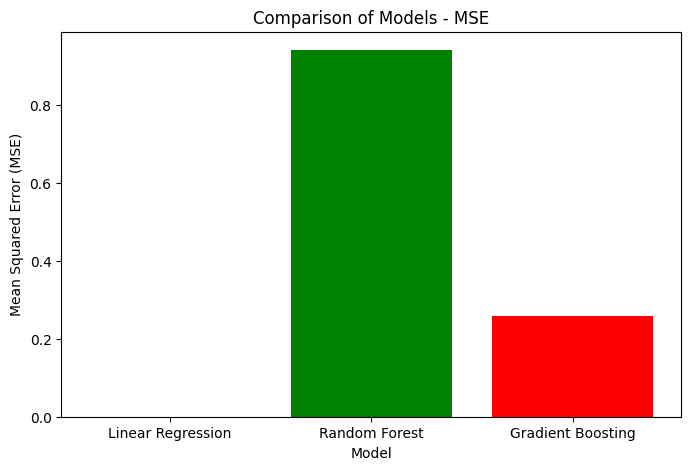

In [ ]:
# Step 7: Compare models' results
print("\nComparison of models' results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

# Step 8: Visualize Results (Bar Plot for MSE)
models_names = list(results.keys())
mse_values = [results[model]['MSE'] for model in models_names]

plt.figure(figsize=(8, 5))
plt.bar(models_names, mse_values, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Models - MSE')
plt.show()
